# EDA Assignment

In [ ]:
# 1. What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.
'''
AI is the broad field of creating machines that can think, reason, and act like humans.
AI includes reasoning, problem-solving, planning, perception, and natural language understanding.
Example - Chatgpt and Self-driving cars.
ML is a subset of AI where machines learn from data without being explicitly programmed.
The system finds patterns and improves over time.
Example - Predicting house prices.
DL is a subset of Machine Learning that uses artificial neural networks with many layers.
It requires large datasets and high computing power (GPUs).
Example - Face recognition.
Data Science is about extracting insights and meaningful information from data.
It uses statistics, data analysis, and visualization to solve business problems with data.
Example - Forecasting sales.
'''

In [ ]:
# 2. Explain overfitting and underfitting in ML. How can you detect and prevent them?
'''
Underfitting happens when a model is too simple and cannot learn the underlying patterns in the data.
Symptoms: High error on training data and High error on test data.
Causes: Model is too simple
How to Fix: Use a more complex model (Random Forest, polynomial regression) and Increase training time.
Overfitting happens when the model learns training data too well but fails to generalize to new unseen data.
Symptoms: Low error on training data and High error on test data.
Causes: 1. Model is too complex 2. Not enough training data.
Cross-validation (like k-fold cross-validation) helps evaluate how well the model generalizes.
It reduces overfitting by ensuring the model is tested on multiple splits of the data—not just one.
'''

In [ ]:
# 3. How would you handle missing values in a dataset? Explain at least three methods with examples.
'''
1. Deletion (Removing Missing Data) - When to use:
If the missing values are very few (ex: < 5%)
If removing them does not affect pattern or dataset size.
Types of Deletion:
Listwise Deletion - Remove entire row if any column has missing value
Pairwise Deletion - Use the available data depending on the algorithm (keeps more data than listwise).
2. Imputation (Fill Missing Values) - Missing values are filled with mean, median and mode.
3. Predictive Modeling - build a model to predict missing values using other features.
Methods - Regression, Classification
'''

In [ ]:
# 4. What is an imbalanced dataset? Describe two techniques to handle it.
'''
An imbalanced dataset is a dataset where the distribution of classes is not equal.
One class (majority class) has many more samples than the other (minority class).
Example (Binary Classification):
Class 0 - 95%
Class 1 - 5%
This causes the model to become biased and predict mostly the majority class.
1. Sampling Methods - 
A. Random Oversampling - Duplicate samples of minority class until balance is achieved.
B. Random Undersampling - Remove samples from majority class to balance the dataset.
2. SMOTE - 
Instead of duplicating minority samples, SMOTE creates synthetic examples by interpolating between existing ones.
This reduces overfitting and improves generalization.
3. Class Weights (Model-Based Solution) - 
Instead of balancing the dataset, you tell the algorithm to penalize misclassification of the minority class more heavily.
'''

In [ ]:
# 5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.
'''
Feature scaling is important in machine learning because many algorithms work based on numerical distance or gradient optimization.
If the features in a dataset have very different ranges, the model may unintentionally give more importance to the feature with larger values.
This affects learning accuracy, convergence speed, and fairness among features.
Scaling ensures all features contribute equally and the model performs effectively.
Min-Max scaling transforms values into a fixed range—usually 0 to 1.
It is useful for algorithms like neural networks and KNN but is sensitive to outliers because extreme values affect the range.
For example, if the minimum value is 10 and the maximum is 30, the value 20 becomes 0.5 after scaling.
Standardization transforms values such that the feature has a mean of 0 and a standard deviation of 1.
It does not force values into a fixed range and is less affected by outliers.
'''

In [ ]:
# 6. Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?
'''
Label Encoding and One-Hot Encoding are two common techniques used to convert categorical data into numerical format.
So that machine learning models can process them.
They serve different purposes depending on whether the categories have a meaningful order or not.
Label Encoding assigns a unique numeric value to each category.
For example, if a column contains ["Low", "Medium", "High"], label encoding may convert them to 0, 1, and 2.
This type of encoding is useful when the categorical data has an ordinal relationship.
One-Hot Encoding creates a separate binary (0/1) column for each category.
For example, the categories ["Red", "Blue", "Green"] become three separate columns: Red, Blue, and Green, with only one column marked as 1 for each sample.
This is ideal for nominal categorical data, where categories do not have any inherent ordering—such as country names, colors, or product types.
One-hot encoding prevents models from assuming numerical relationships between categories, but it also increases the dimensionality of the dataset, especially when there are many unique categories.
'''

In [2]:
# 7. For Google playstore dataset, Analyze the relationship between app categories and ratings. Which categories have the
# highest/lowest average ratings, and what could be the possible reasons?
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("C:\\Users\\ROHIT\\Downloads\\googleplaystore.csv")   

# Quick look
print("Total rows:", len(df))
print("Columns:", df.columns.tolist())

# Clean data
df = df.dropna(subset=['Rating', 'Category'])

# Convert rating to numeric 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])
df = df[(df['Rating'] >= 0) & (df['Rating'] <= 5)]  

# Compute average rating per category
cat_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("\nAverage rating per category (top 10):")
print(cat_rating.head(10))

print("\nAverage rating per category (bottom 10):")
print(cat_rating.tail(10))

cat_count = df['Category'].value_counts()
print("\nNumber of apps per category (top 10):")
print(cat_count.head(10))

summary = pd.DataFrame({
    'avg_rating': cat_rating,
    'num_apps': cat_count
}).sort_values(by='avg_rating', ascending=False)
print("\nSummary (top 20 by rating):")
print(summary.head(20))

Total rows: 10841
Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Average rating per category (top 10):
Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64

Average rating per category (bottom 10):
Category
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613
TOOLS                  4.047411
DATING                 3.970769
Name: Rating, dtype: float64

Number of apps per cate

In [3]:
# 8. Titanic Dataset
# a. Compare the survival rates based on passenger class (Pclass). Which class had the highest
# survival rate, and why do you think that happened?
# b. Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
# adults (Age ≥ 18). Did children have a better chance of survival?
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\ROHIT\\Downloads\\titanic.csv")
# Group by passenger class and calculate survival rate
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rate by Passenger Class (%):\n", survival_by_class)

# Create age groups
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Remove rows with missing age
df_age_clean = df.dropna(subset=['Age'])

# Calculate survival rate by age group
survival_by_age = df_age_clean.groupby('AgeGroup')['Survived'].mean() * 100
print("Survival Rate by Age Group (%):\n", survival_by_age)

Survival Rate by Passenger Class (%):
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Survival Rate by Age Group (%):
 AgeGroup
Adult    38.103161
Child    53.982301
Name: Survived, dtype: float64


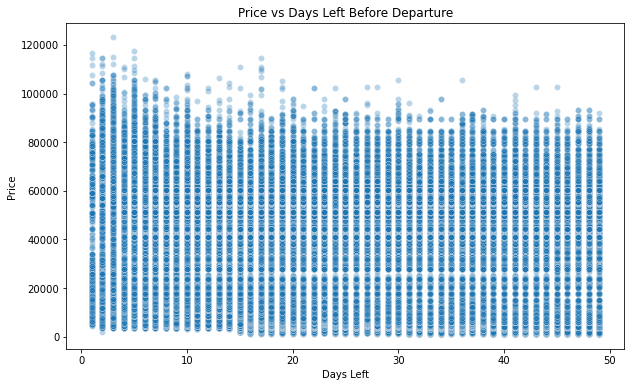

  DaysBucket         price
0        0-7  26451.234827
1       8-14  23768.362808
2      15-21  20201.005958
3      22-30  19647.445561
4      31-45  19335.684475
5      46-60  18963.825600
6        60+           NaN


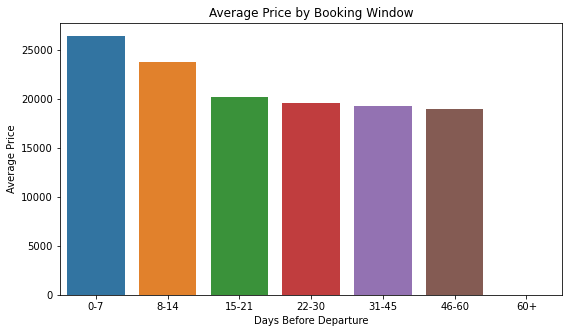

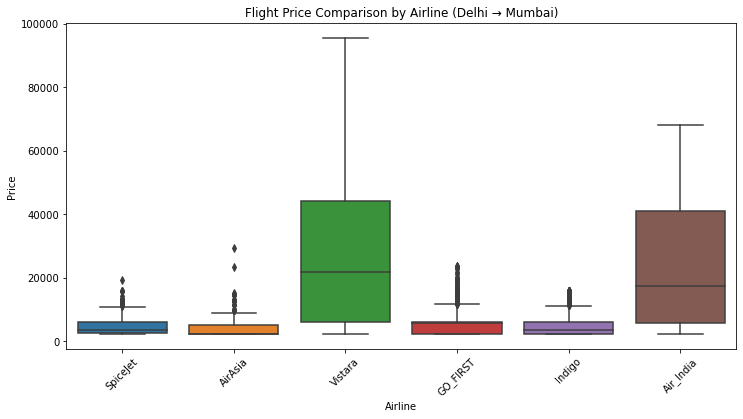

                   mean   median  count
airline                                
AirAsia     3981.191456   2410.0    632
Indigo      4473.739130   3570.0   1656
SpiceJet    4628.251984   3519.0    504
GO_FIRST    5762.211515   5806.0   1650
Air_India  23695.916916  17295.0   5007
Vistara    26630.293322  21718.5   5840


In [6]:
# 9. Flight Price Prediction Dataset
# a) How do flight prices vary with the days left until departure? Identify any exponential price
# surges and recommend the best booking window.
# b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
# consistently cheaper/premium, and why?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv("C:\\Users\\ROHIT\\Downloads\\flight_price.csv")
# A. Price vs Days Left
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["days_left"], y=df["price"], alpha=0.3)
plt.title("Price vs Days Left Before Departure")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()
# Group price by range of days left
df['DaysBucket'] = pd.cut(df['days_left'],
                          bins=[0,7,14,21,30,45,60,180],
                          labels=["0-7","8-14","15-21","22-30","31-45","46-60","60+"]
                         )
price_by_bucket = df.groupby('DaysBucket')['price'].mean().reset_index()
print(price_by_bucket)
# Bar Plot for Easier Insight
plt.figure(figsize=(9,5))
sns.barplot(x="DaysBucket", y="price", data=price_by_bucket)
plt.title("Average Price by Booking Window")
plt.xlabel("Days Before Departure")
plt.ylabel("Average Price")
plt.show()

# B. Filter for a single route (for example Delhi to Mumbai)
route_df = df[(df['source_city'] == "Delhi") & (df['destination_city'] == "Mumbai")]
# Boxplot comparison
plt.figure(figsize=(12,6))
sns.boxplot(data=route_df, x='airline', y='price')
plt.title("Flight Price Comparison by Airline (Delhi → Mumbai)")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()
# Mean and Median Prices
airline_prices = route_df.groupby('airline')['price'].agg(['mean','median','count']).sort_values("mean")
print(airline_prices)